## Playing with neural nets.
+ Concentric classes, 1 layer, Sigmoid.
+ Concentric classes, 1 layer, ReLu.
+ X-or, 0 layer.
+ X-or, 1 layer.
+ Spiral data.
+ Regression.


http://playground.tensorflow.org

![GitHub Logo](https://srirangatarun.files.wordpress.com/2016/12/screen-shot-2019-06-19-at-12.45.40-pm.png)


In [2]:
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))


# Convolutional Neural Networks

## What is a Convolution? 

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [4]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(batch_size, height, width, channels)

2 427 640 3


filters:


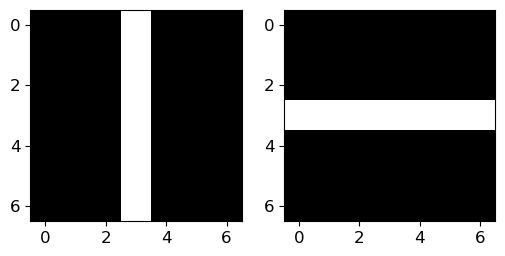

In [5]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

print("filters:")
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(filters[:,:,:,0],cmap="gray")
plt.subplot(122)
plt.imshow(filters[:,:,:,1],cmap="gray")
plt.show()


2023-05-23 11:00:38.534348: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 11:00:38.535427: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


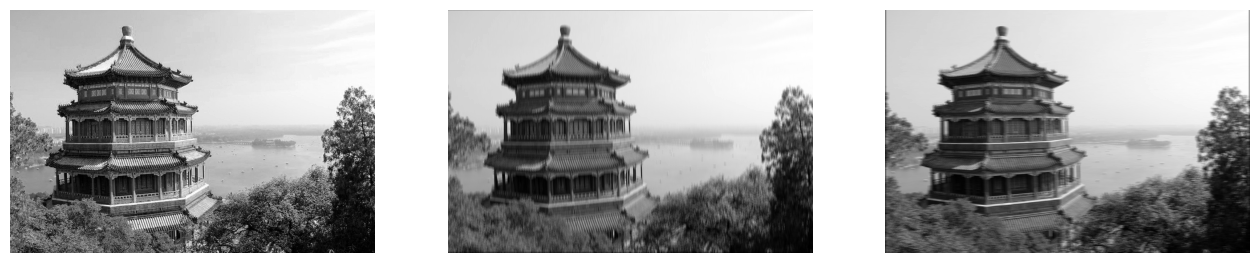

In [6]:
## lets apply these filters to our images

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(images[0, :, :, 0], cmap="gray") # plot 1st image
plt.axis("off") 

plt.subplot(132)
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.axis("off") 

plt.subplot(133)
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") 
plt.show()

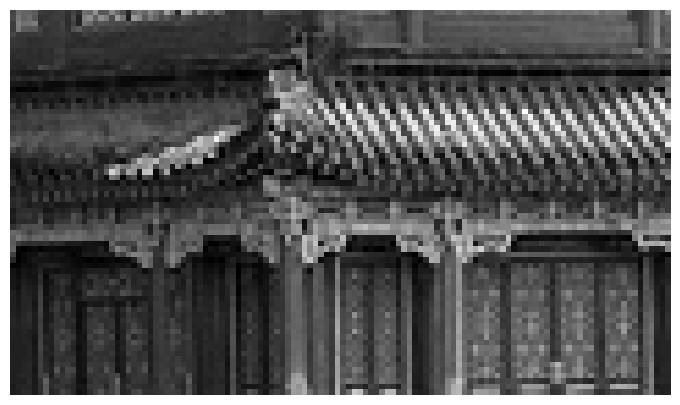

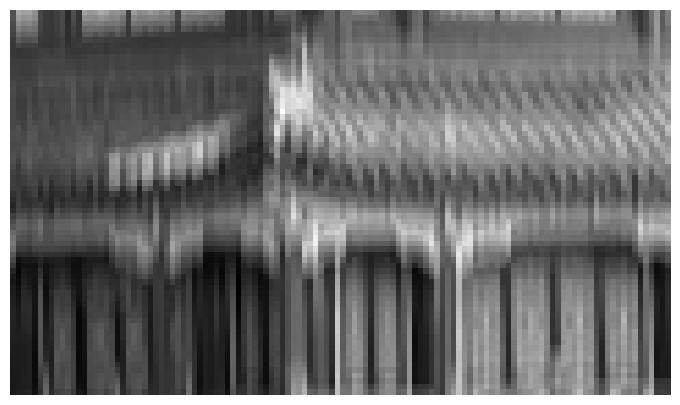

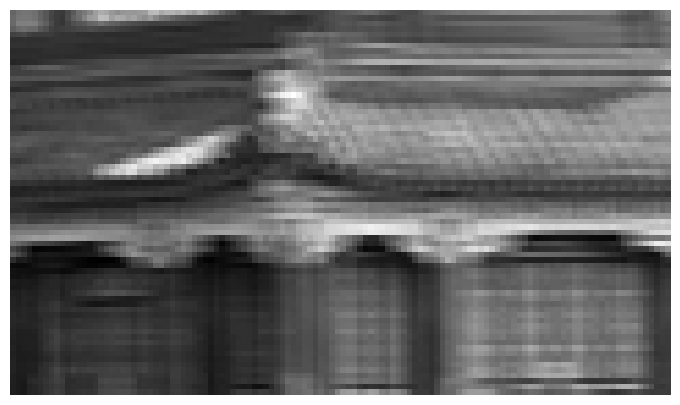

In [7]:
def crop(images):
    return images[150:220, 130:250]
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

# Deep Learning in `keras`

> Keras is a high-level neural networks library, written in Python and capable of running on top TensorFlow. It was developed with a focus on enabling fast experimentation.

The core data structure of Keras is a model, a way to organize layers. The main type of model is the ``Sequential model``, a linear stack of layers. 

```Python
from keras.models import Sequential
model = Sequential()
```

Stacking layers is as easy as ``.add()``:

```Python
from keras.layers import Dense, Activation

model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))
```

Once your model looks good, configure its learning process with ``.compile()``:

```Python
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', metrics=['accuracy'])
```

If you need to, you can further configure your optimizer.

```Python
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
```

You can now iterate on your training data in batches:

```Python
model.fit(X_train, Y_train, nb_epoch=5, batch_size=32)
```

Evaluate your performance in one line:
```Python
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
```

Or generate predictions on new data:

```Python
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)
```

## FIRST PROBLEM: FASHION MNIST CLASSIFICATION

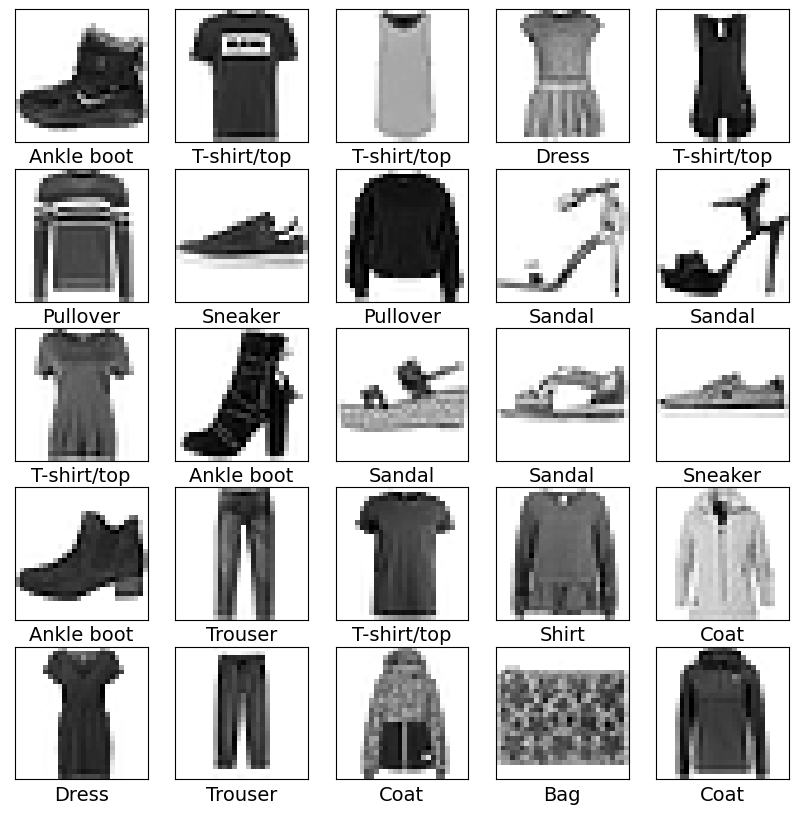

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() # fetch FASHION-10 data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


num_train, height, width  = X_train.shape # there are 50000 training examples in FASHION-10 
num_test = X_test.shape[0] # there are 10000 test examples in FASHION-10

X_train = X_train.reshape(num_train,height*width,)
X_test = X_test.reshape(num_test,height*width,)
depth =1


num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_test) # Normalise data to [0, 1] range



Y_train = keras.utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = keras.utils.to_categorical(y_test, num_classes) # One-hot encode the labels


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(Y_train[i])])
plt.show()

In [9]:
import matplotlib.pylab as plt

def plot_history(histories):
    for (history,name) in histories:
        plt.plot(history.history['accuracy'],'o-',label  = name+' train')
        plt.plot(history.history['val_accuracy'],'o--',label  = name+' test')

        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(loc='upper left')
    plt.show()

    for (history,name) in histories:
        plt.plot(history.history['loss'],'o-',label  = name+' train')
        plt.plot(history.history['val_loss'],'o--',label  = name+' test')

        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(loc='upper left')
    plt.show()

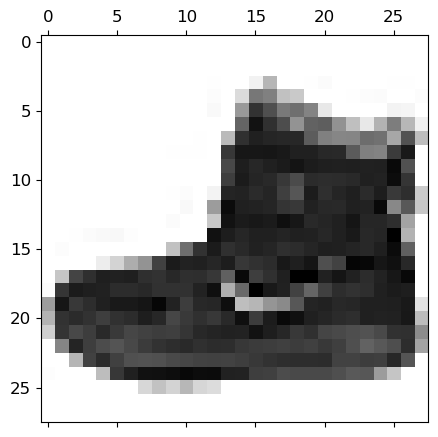

label 0


In [10]:
i = 0
plt.matshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
plt.show()
print("label", np.argmax(y_train[i]),)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop


## DEFINE PARAMETERS
batch_size = 128
num_classes = 10
epochs = 10


## CREATE THE MODEL
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

## PRINT SUMMARY
model.summary()

## COMPILE MODEL -> loss + optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## TRAIN THE MODEL
history_baseline = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))


## EVALUATE THE MODEL USING TEST SET
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.4993 - accuracy: 0.8255 - val_loss: 0.4637 - val_accuracy: 0.8320
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3588 - accuracy: 0.8686 - val_loss: 0.3905 - val_accuracy: 0.8530
Epoch 3/10
60000/60000 [==========

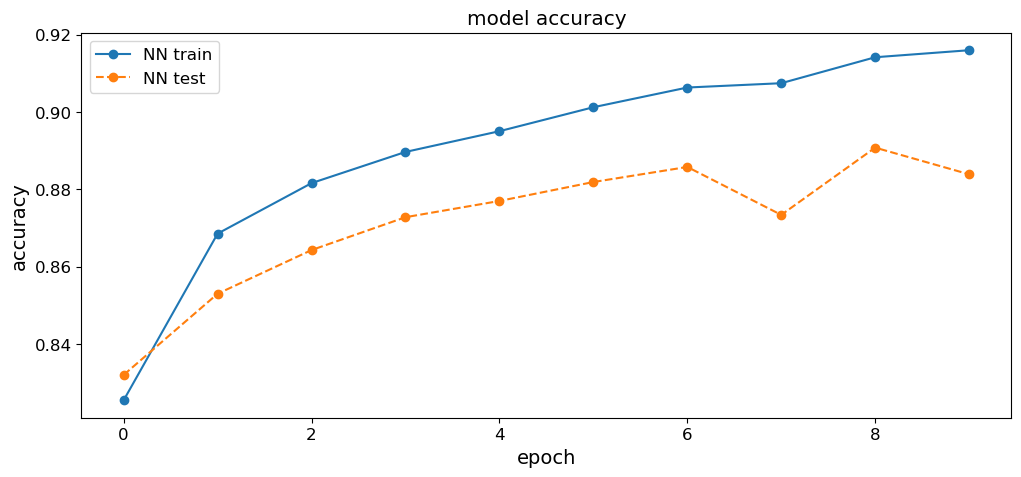

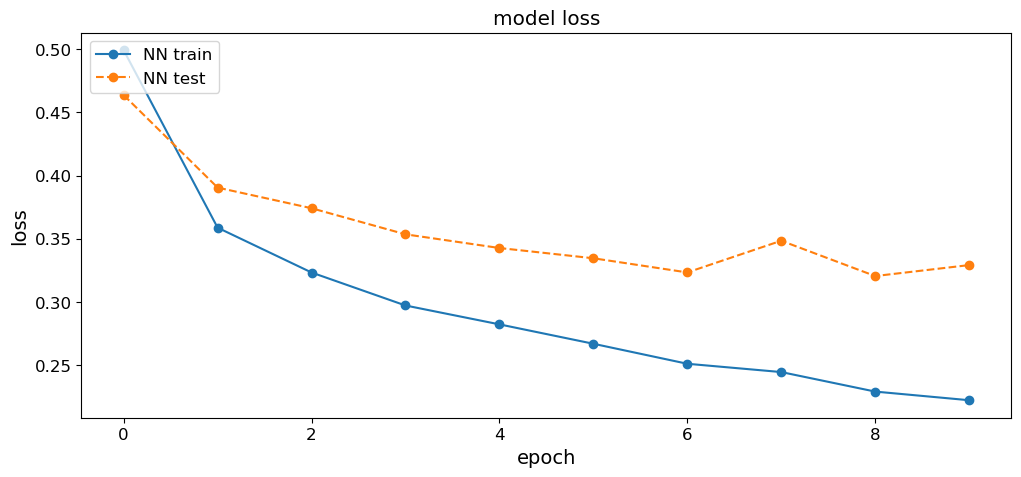

In [12]:
plot_history([(history_baseline,'NN')])

### Dropout

Dropout is a way to regularize the neural network. During training, it may happen that neurons of a particular layer may always become influenced only by the output of a particular neuron in the previous layer. In that case, the neural network would overfit.

Dropout prevents overfitting and regularizes by randomly cutting the connections (also known as dropping the connection) between neurons in successuve layers during training.

In [13]:
## from keras.models import Sequential
from keras.layers import Dense, Dropout


## CREATE A SIMPLE MODEL
batch_size = 128
num_classes = 10
epochs = 10


model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

## PRINT SUMMARY
model.summary()

## COMPILE MODEL -> loss + optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## TRAIN THE MODEL
history_dropout = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))


## EVALUATE THE MODEL USING TEST SET
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112

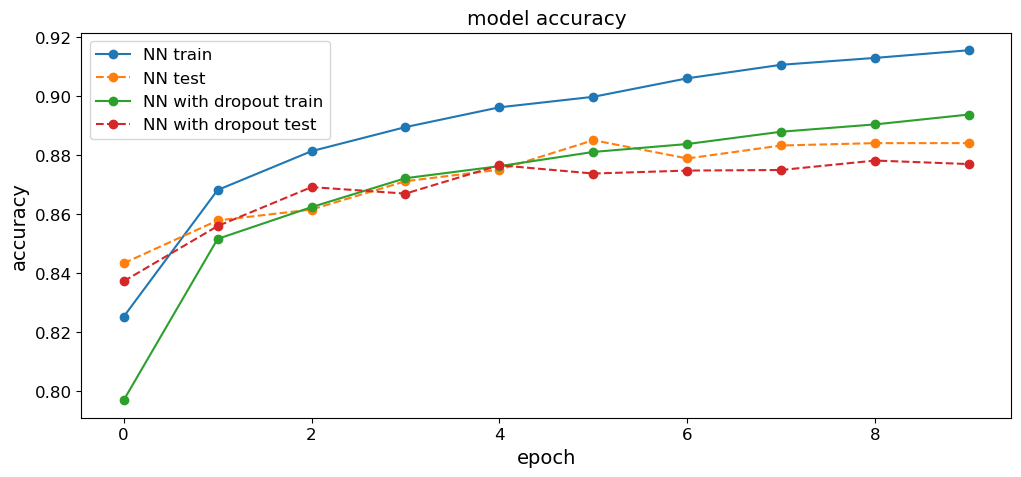

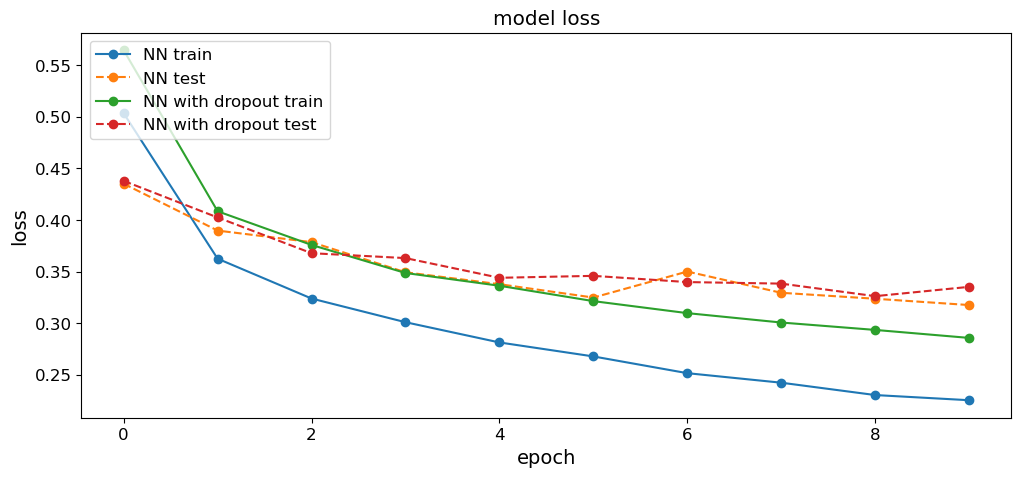

In [13]:
plot_history([(history_baseline,'NN'),(history_dropout,'NN with dropout')])

## CNN

The previously mentioned multilayer perceptrons represent the most general and powerful feedforward neural network model possible; they are organised in layers, such that every neuron within a layer receives its own copy of all the outputs of the previous layer as its input. This kind of model is perfect for the right kind of problem – learning from a fixed number of (more or less) unstructured parameters.

> However, consider what happens to the number of parameters (weights) of such a model when being fed raw image data (f.e. a $200 \times 200$ pixel image connected to 1024 neurons).

In [14]:
200 * 200 * 1024

40960000

The situation quickly becomes unmanageable as image sizes grow larger, way before reaching the kind of images people usually want to work with in real applications.

A common solution is to downsample the images to a size where MLPs can safely be applied. However, if we directly downsample the image, we potentially lose a wealth of information; it would be great if we would somehow be able to still do some useful (without causing an explosion in parameter count) processing of the image, prior to performing the downsampling.

It turns out that there is a very efficient way of pulling this off, and it makes advantage of the structure of the information encoded within an image – it is assumed that pixels that are spatially closer together will "cooperate" on forming a particular feature of interest much more than ones on opposite corners of the image. Also, if a particular (smaller) feature is found to be of great importance when defining an image's label, it will be equally important if this feature was found anywhere within the image, regardless of location.

Enter the convolution operator. Given a two-dimensional image, $I$, and a small matrix, $K$ of size $h \times w$, (known as a convolution kernel), which we assume encodes a way of extracting an interesting image feature, we compute the convolved image, $I∗K$, by overlaying the kernel on top of the image in all possible ways, and recording the sum of elementwise products between the image and the kernel:

$$
output(x,y) = (I \otimes K)(x,y) = \sum_{m=0}^{M-1} \sum_{n=1}^{N-1} K(m,n) I(x-n, y-m)
$$

The convolution operator forms the fundamental basis of the convolutional layer of a CNN. The layer is completely specified by a certain number of kernels, $K$, and it operates by computing the convolution of the output images of a previous layer with each of those kernels, afterwards adding the biases (one per each output image). Finally, an activation function, $\sigma$, may be applied to all of the pixels of the output images. 

Typically, the input to a convolutional layer will have $d$ channels (e.g., red/green/blue in the input layer), in which case the kernels are extended to have this number of channels as well.

Note that, since all we're doing here is addition and scaling of the input pixels, the kernels may be learned from a given training dataset via gradient descent, exactly as the weights of an MLP. In fact, an MLP is perfectly capable of replicating a convolutional layer, but it would require a lot more training time (and data) to learn to approximate that mode of operation.

## Pooling

In fact, after a convolutional layer there are two kinds of non linear functions that are usually applied: non-linear activation functions such as sigmoids or ReLU and *pooling*. Pooling layers are used with the purpose to progressively reduce the spatial size of the image to achieve scale invariance. The most common layer is the *maxpool* layer. Basically a maxpool of $2 \times 2$ causes a filter of 2 by 2 to traverse over the entire input array and pick the largest element from the window to be included in the next representation map. Pooling can also be implemented by using other criteria, such as averaging instead of taking the max element. 

In [15]:
## the imports
from tensorflow.keras.models import Sequential
#from keras.layers import Conv2D
from tensorflow.keras.layers import Conv2D,Input, MaxPooling2D, Dense, Dropout, Activation, Flatten

In [ ]:
## CREATE A MODEL TO CLASSIFY THE 10 FASHION CLASSES

## DEFINE PARAMETERS
kernel_size = (3,3)
batch_size = 128
pool_size = 2 # we will use 2x2 pooling throughout

## CREATE THE MODEL: 
model = Sequential()
model.add(Conv2D(32,kernel_size,activation = 'relu',input_shape = (height,width,depth)))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

## PRINT SUMMARY
model.summary()

## COMPILE MODEL -> loss + optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

X_train = X_train.reshape(num_train,height,width,1)
X_test = X_test.reshape(num_test,height,width,1)


## TRAIN THE MODEL
history_cnn = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

## EVALUATE THE MODEL USING TEST SET
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.5285 - accuracy: 0.8210 - val_loss: 0.3966 - val_accuracy: 0.8606
Epoch 2/10
60000/60000 [===========================

In [ ]:
#let's plot some intersting information: the learning curves
plot_history([(history_cnn,'CNN')])

In [ ]:
plot_history([(history_baseline,'NN'),(history_dropout,'NN with dropout'),(history_cnn,'CNN')])

In [ ]:
# Exercice: Can you improve it??
# your code here:
# train and evaluate your model




In [ ]:
predictions = model.predict(X_test)

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    true_label = true_label.argmax()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28,28)), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                            100*np.max(predictions_array),
                            class_names[true_label]),
                            color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    true_label = true_label.argmax()
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')




num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()

## CIFAR-10 

In [22]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import numpy as np

batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 2 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons



(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

num_train, height, width, depth = X_train.shape # there are 50000 training examples in CIFAR-10 
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_test) # Normalise data to [0, 1] range

Y_train = keras.utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = keras.utils.to_categorical(y_test, num_classes) # One-hot encode the labels

# CREATE MODEL
inp = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        3692

In [23]:
# Train and evaluate

history = model.fit(X_train, Y_train,                # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!

Train on 45000 samples, validate on 5000 samples
Epoch 1/2
26208/45000 [================>.............] - ETA: 1:59 - loss: 1.7005 - accuracy: 0.3662

KeyboardInterrupt: 

In [ ]:
#let's plot some very intersting information: the learning curves
plot_history([(history,'NN')])

# Predict Sentiment Analysis 

The Large Movie Review Dataset (often referred to as the IMDB dataset) contains 25,000 highly polar moving reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given moving review has a positive or negative sentiment.

The data was collected by Stanford researchers and was used in a 2011 paper [PDF] where a split of 50/50 of the data was used for training and test. An accuracy of 88.89% was achieved. This data set was also in a Kaggle compeition titled “Bag of Words Meets Bags of Popcorn” in late 2014 to early 2015. Accuracy was achieved above 97% with winners achieving 99%.

#### Simple Multi-Layer Perceptron Model for the IMDB Dataset


In [24]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

###  Importing and analzing the dataset
The dataset that can be downloaded from this <a href="https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">Kaggle link</a>.


In [25]:
movie_reviews = pd.read_csv("IMDB Dataset.csv")
print(movie_reviews.shape)
movie_reviews.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [26]:
# We can look at to one review 
movie_reviews["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

### Data Processing
Althought Deep Learning work with raw data, and so, it should not be neeeded to preprocess it,the reality is that it allways help

In [27]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # lower case
    sentence = sentence.lower()
    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

Let's see the output of the preprocessed review

In [28]:
X[0]

'one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare forget pretty picture

In [29]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

We can use train_test_split method from the sklearn.model.selection module, as shown below:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Preparing the Embedding Layer


In [31]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [32]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [33]:
#Prepare the training parameters
num_epochs = 2

### Text Classification with a Simple Neural Network

In [34]:
# create the model
model = Sequential()
embedding_layer = Embedding(vocab_size, 50,  input_length=maxlen , trainable=True)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model
history_NN = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, 
                    batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           4627350   
_________________________________________________________________
flatten_2 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 30)                150030    
_________________________________________________________________
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 4,779,271
Trainable params: 4,779,271
Non-trainable params: 0
____________________________________________

/Users/ssegui/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 24s 589us/step - loss: 0.4454 - accuracy: 0.7724 - val_loss: 0.3261 - val_accuracy: 0.8539
Epoch 2/2
10880/40000 [=======>......................] - ETA: 16s - loss: 0.2162 - accuracy: 0.9205

KeyboardInterrupt: 

### Text Classification with a Convolution Neural Network

In [ ]:
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D

# create the model
model = Sequential()
'''YOUR CODE HERE'''


# Fit the model
history_CNN = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, 
                    batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

